In [21]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common
import importlib
importlib.reload(common)

<module 'common.common' from '/Users/bytedance/Downloads/work/CS5344_Project/work/common/common.py'>

In [2]:
%run ../datasets/unsw.ipynb

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [3]:
all_df, main_labels, config = get_unsw_df()

Normal class:  0    Normal
Name: attack_cat, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [5]:
all_df.shape

(175341, 36)

In [6]:
all_df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


## 2. Data Cleaning Check
* Check for null/missing values
* Check for wrong values
* Drop unnecessary columns

In [7]:
all_df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

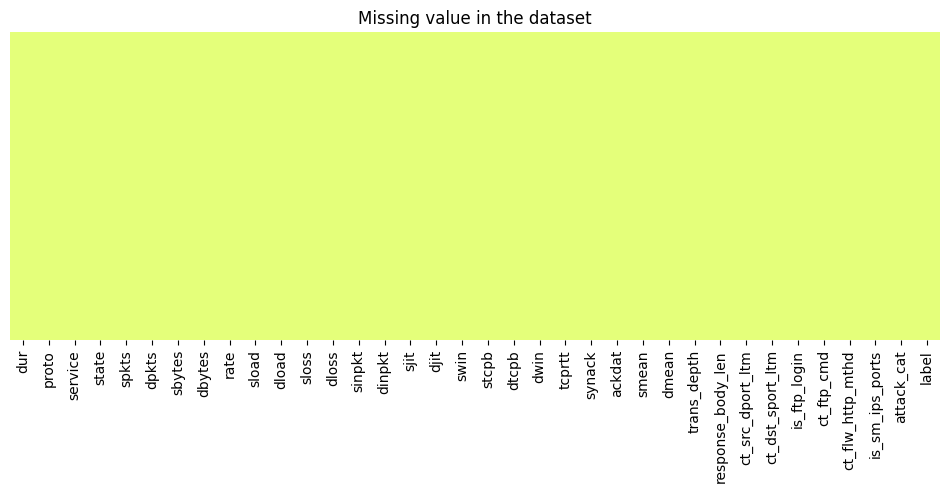

In [8]:
common.show_missing_values(all_df)

In [9]:
for col in all_df.columns:
    print(all_df[col].value_counts())
    print("--------------------------------")

dur
0.000009    23031
0.000003    11751
0.000008    10634
0.000005     6690
0.000004     5026
            ...  
0.015821        1
0.246898        1
0.014855        1
0.032971        1
1.557125        1
Name: count, Length: 74039, dtype: int64
--------------------------------
proto
tcp      79946
udp      63283
unas     12084
arp       2859
ospf      2595
         ...  
argus       98
hmp         98
igmp        18
icmp        15
rtp          1
Name: count, Length: 133, dtype: int64
--------------------------------
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64
--------------------------------
state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64
-------------------------------

In [10]:
all_df = all_df.drop(columns='label')
all_df['attack_cat'] = all_df['attack_cat'].replace('backdoors','backdoor', regex=True)

## 3. Summary Statistics
* Mean, median, min, max, percentiles
* Understand data distribution for numerical features
* Check for outliers

In [11]:
all_df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,...,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712055e+05,4.953000,6.948010,...,136.751769,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,165400.968750,1.883574e+08,2.421312e+06,66.005059,52.732999,...,204.677360,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,28.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,...,57.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,...,73.000000,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,...,100.000000,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,...,1504.000000,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000


In [12]:
all_df['is_ftp_login'] = np.where(all_df['is_ftp_login']>1, 1, all_df['is_ftp_login'])

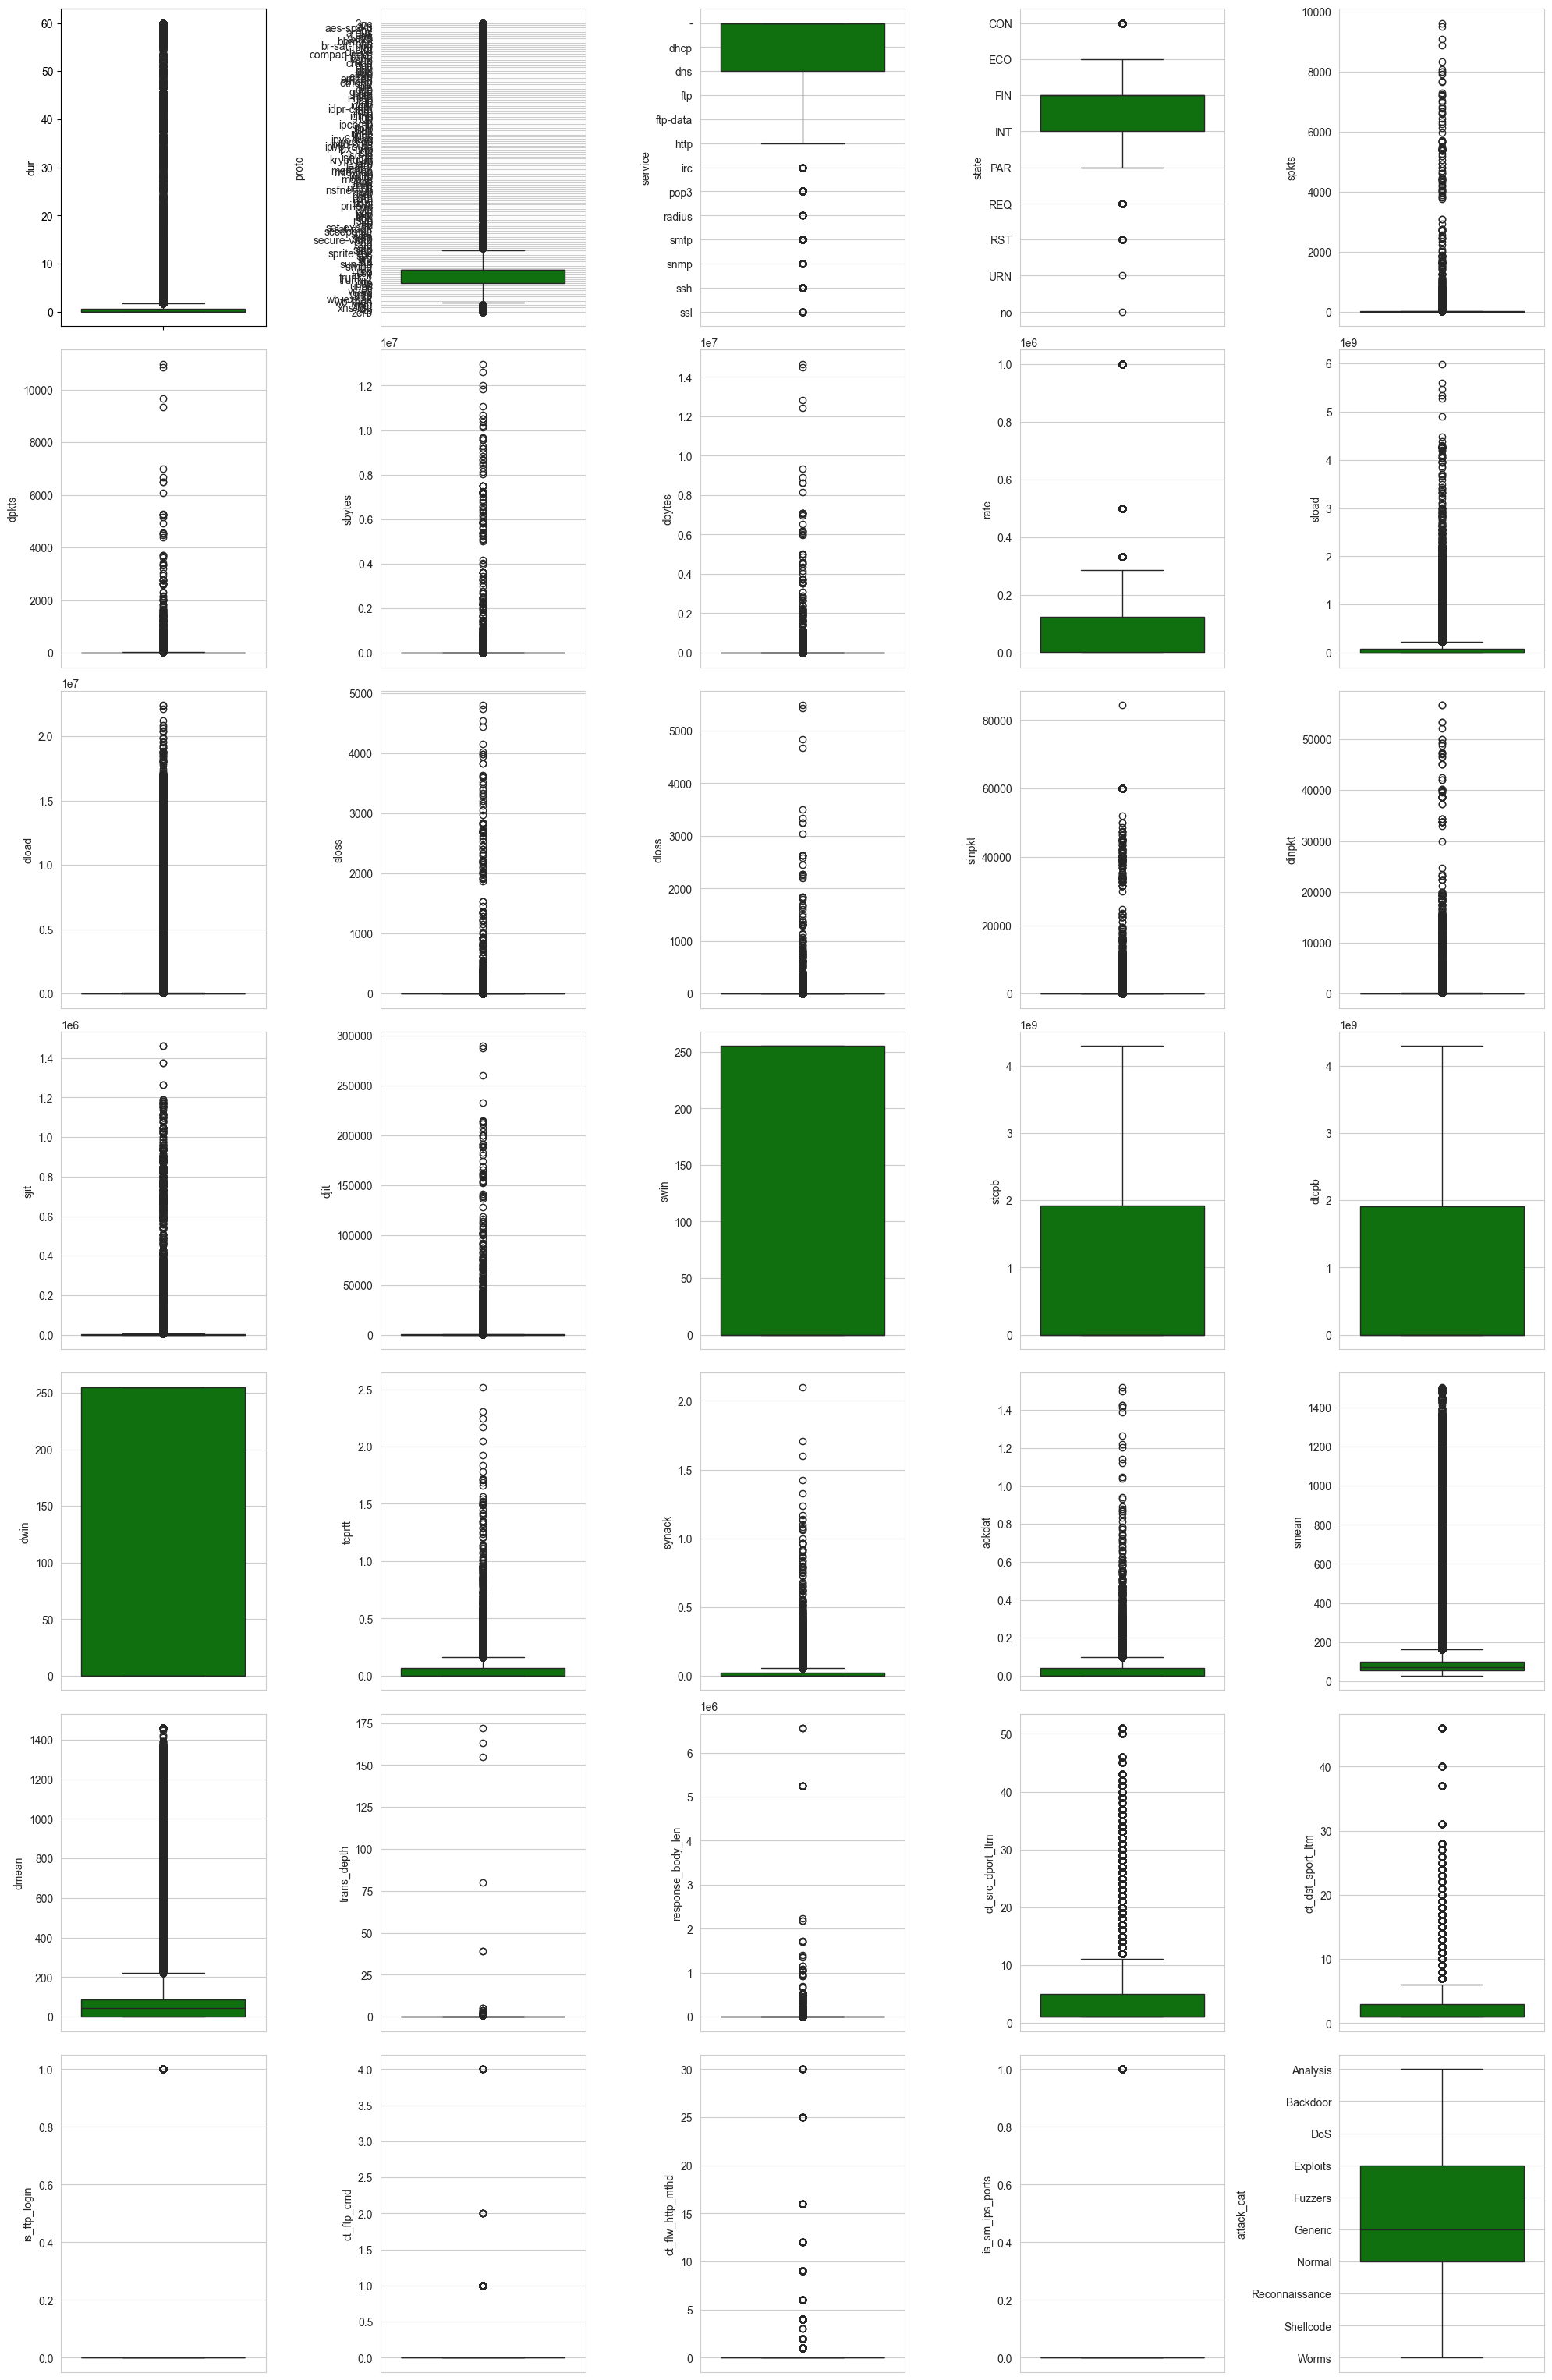

In [13]:
common.show_boxplots(all_df)

In [ ]:
columns_to_plot_distribution = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 
                              'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 
                              'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 
                              'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd']
columns_to_plot_distribution = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',]
num_df = all_df.loc[:, columns_to_plot_distribution]
common.show_distribution_graph(num_df, columns_to_plot_distribution)

## 4. Univariate Analysis (Single Variable)
* Categorical variables:
    * Frequency distribution
    * Bar plots or pie charts.
* Numerical variables:
    * Histograms or box plots.
    * Distribution plots

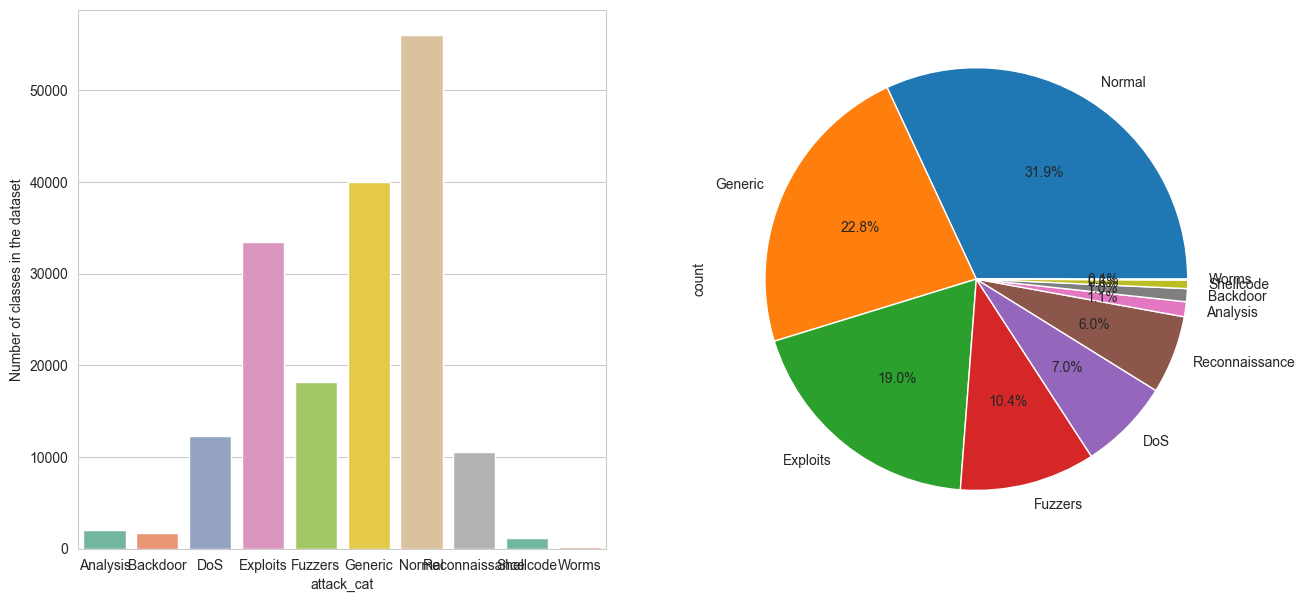

In [15]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

## 5. Bivariate/Multivariate Analysis
* Correlation matrix (for numerical variables)
* Scatter plots (to assess relationships between two numerical variables)
* Pair plots (to visualize relationships across multiple variables)
* Group-wise statistics (e.g., groupby() for summarizing data by category)

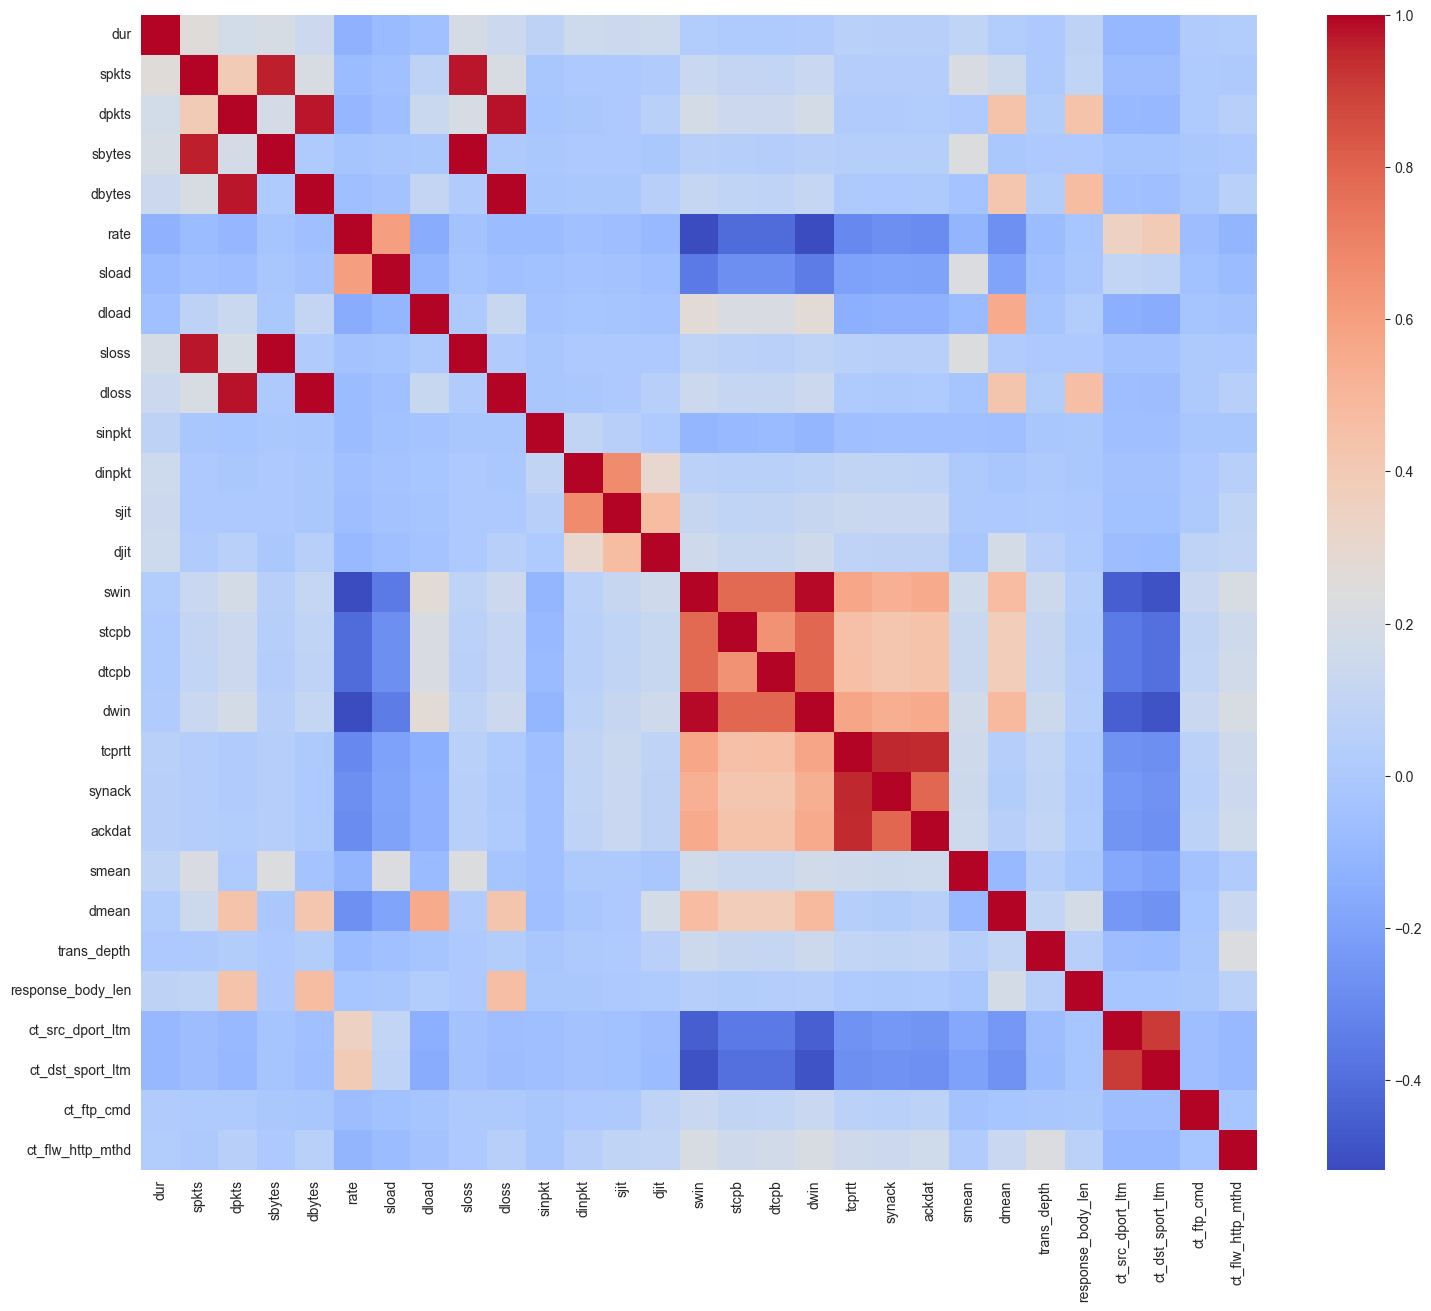

In [22]:
common.show_feature_correlation(num_df)